# Tensorflow Tutorial

# 1 - Practice

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.python.framework import ops
# from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

$$cost = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [3]:
# 定义常量
y_hat = tf.constant(6, name = 'y_hat')
y = tf.constant(2, name = 'y')
# 定义变量
# (6 - 2) ^2 = 16
cost = tf.Variable((y_hat - y) ** 2, name = 'cost')
tf.print(cost)

16


In [4]:
c = tf.multiply(y_hat, y)
print(c) # tf.Tensor(12, shape=(), dtype=int32)
tf.print(c) # 12

tf.Tensor(12, shape=(), dtype=int32)
12


In [5]:
# 定义函数
@tf.function
def f(x):
    return 2 * x

print(f(3))

tf.Tensor(6, shape=(), dtype=int32)


## 1.1 - Linear Regression

In [6]:
def linear_regression ():
    np.random.seed(1)
    # Y = np.dot(W.T, X) + b
    X = np.random.randn(3, 1)
    W = np.random.randn(3, 4)
    b = np.random.randn(4, 1)
    Y = tf.add(tf.matmul(W.T, X), b)
    return Y
    
Y_pred = linear_regression()

## 1.2 - Sigmoid function

In [7]:
def sigmoid (Z):
    # 1 / (np.exp(-Z) + 1)
    return tf.sigmoid(Z)

sigmoid(np.random.randn(3, 1))

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[0.64171493],
       [0.2496239 ],
       [0.75854586]])>

# 1.3 - Cost function

$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$


In [8]:
"""
def cost_function (A, Y):
    m = Y.shape[1]
    cost = - Y * np.log(A + 1e-7) - (1 - Y) * np.log(1 - A + 1e-7)
    return np.sum(cost) / m
"""
def cost_function (A, Y):
    return tf.nn.sigmoid_cross_entropy_with_logits(A, Y)

Y = tf.constant(np.random.randn(4, 1), name = 'y')
cost_function(Y_pred, Y)

<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[2.40441885],
       [0.3684111 ],
       [5.08026603],
       [1.35428678]])>

# 1.4 - Initialize with zeros and ones
- shape = [2, 3]
- tf.ones(shape)
- tf.zeros(shape)

In [9]:
def initialize_zeros_ones (shape):
    ones = tf.ones(shape)
    zeros = tf.zeros(shape)
    return ones, zeros

initialize_zeros_ones([2, 3])

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32)>)

## 1.5 - One Hot encodings (softmax)

![image](https://github.com/Kulbear/deep-learning-coursera/raw/997fdb2e2db67acd45d29ae418212463a54be06d/Improving%20Deep%20Neural%20Networks%20Hyperparameter%20tuning,%20Regularization%20and%20Optimization/images/onehot.png)

例如列表有[1, 2, 0] 三个数字, 形成矩阵为
- 1: [0, 1, 0].T
- 2: [0, 0, 1].T
- 0: [1, 0, 0].T


```python
# one-hot方式, 有C列, 每列填1的值, 是[....] 数组决定
np.eye(C)[.....]
```

```python
# TF
tf.one_hot(indices = Y, depth = C, axis = 0)
```

In [17]:
"""
reshape(m, n) 
根据现在的矩阵, 重新将矩阵变成 m列n行
-1 懒得计算填写, python自己推算吧
"""
testOnes = np.ones(shape = (3, 2))
print('testOnes: ', testOnes)
print('reshape(-1): ', testOnes.reshape(-1))
print('reshape(-1, 1): ', testOnes.reshape(-1, 1))
print('reshape(-1, 3): ', testOnes.reshape(-1, 3))

testOnes:  [[1. 1.]
 [1. 1.]
 [1. 1.]]
reshape(-1):  [1. 1. 1. 1. 1. 1.]
reshape(-1, 1):  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
reshape(-1, 3):  [[1. 1. 1.]
 [1. 1. 1.]]


In [18]:
def convert_to_one_hot (Y, C):
    return np.eye(C)[Y.reshape(-1)].T

def convert_to_one_hot_TF(Y, C):
    one_hot_matrix = tf.one_hot(indices = Y, depth = C, axis = 0)
    return one_hot_matrix

In [19]:
Y = np.array([1, 2, 0, 1, 3])
C = 4

print(convert_to_one_hot(Y, C))

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [20]:
print(convert_to_one_hot_TF(Y, C))

tf.Tensor(
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]], shape=(4, 5), dtype=float32)


# 2 - Building NN in TF

## 2.1 - Load Data

In [21]:
def load_dataset():
    train_dataset = h5py.File('data/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
 
    test_dataset = h5py.File('data/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
 
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [22]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [24]:
def handle_data (X_train_orig, Y_train_orig, X_test_orig, Y_test_orig):
    # X flatten
    X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
    X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

    X_train_flatten = X_train_flatten / 255.
    X_test_flatten = X_test_flatten / 255.
    
    # Y softmax
    # [1, 2, 0] => softmax 变换
    Y_train = convert_to_one_hot(Y_train_orig, 6)
    Y_test = convert_to_one_hot(Y_test_orig, 6)
    
    return X_train_flatten, X_test_flatten, Y_train, Y_test

X_train_flatten, X_test_flatten, Y_train, Y_test = handle_data (X_train_orig, Y_train_orig, X_test_orig, Y_test_orig)

print(X_train_flatten.shape) # (12288, 1080)
print(Y_train.shape) # (6, 1080)


(12288, 1080)
(6, 1080)


Label:  2
Label:  [0. 0. 1. 0. 0. 0.]


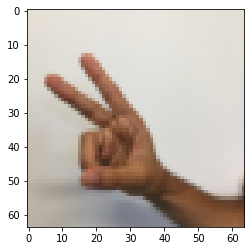

In [25]:
index = 6
plt.imshow(X_train_orig[index])
print('Label: ', np.squeeze(Y_train_orig[:, index]))
print('Label: ', Y_train[:, index])

## 2.2 - Initializing parameters

In [26]:
features = X_train_flatten.shape[0]
# softmax 输出6个数字
Layers = np.array([features, 25, 12, 6])

In [31]:
def init_parameters (Layers):
    np.random.seed(1)
    
    l_input = Layers[0]
    l_hidden_1 = Layers[1]
    l_hidden_2 = Layers[2]
    l_output = Layers[3]

    # 以TF方式 输出这些parameters
    W1 = tf.Variable(np.random.randn(l_input, l_hidden_1))
    b1 = tf.Variable(np.zeros(shape = (l_hidden_1, 1)))
    
    W2 = tf.Variable(np.random.randn(l_hidden_1, l_hidden_2))
    b2 = tf.Variable(np.zeros(shape = (l_hidden_2, 1)))
    
    W3 = tf.Variable(np.random.randn(l_hidden_2, l_output))
    b3 = tf.Variable(np.zeros(shape = (l_output, 1)))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    return parameters


In [32]:
parameters = init_parameters (Layers)

## 2.3 - Forward Propagation

- tf.transpose(W)
- tf.nn.relu(Z)

- tf.matmul(W.T, X)
- tf.add(XX, b)


In [39]:
def forward_propagation (X, parameters):
    p = parameters
    W1 = p['W1']
    b1 = p['b1']
    
    W2 = p['W2']
    b2 = p['b2']
    
    W3 = p['W3']
    b3 = p['b3']
    
    # np.dot(W.T, X) + b
    Z1 = np.dot(tf.transpose(W1), X) + b1
    A1 = tf.nn.relu(Z1)
    
    Z2 = np.dot(tf.transpose(W2), A1) + b2
    A2 = tf.nn.relu(Z2)
    
    # tf.add(tf.matmul(tf.transpose(W3), A2), b3)
    Z3 = np.dot(tf.transpose(W3), A2) + b3

    return Z3

In [40]:
Z3 = forward_propagation(X_train_flatten, parameters)
print(Z3)

tf.Tensor(
[[-321.63048498 -408.61544615 -431.74897472 ... -437.81962796
  -336.68337789 -396.6043488 ]
 [ 292.15201455  382.96857748  158.35656135 ...  378.89846808
   145.15841231  169.23050794]
 [ -23.36163251 -171.14646118  -16.08087056 ... -136.25647004
   -76.70290991 -148.35155579]
 [ 360.64011526  522.45586139  443.66849071 ...  490.68539838
   304.41858068  498.33545174]
 [-161.09857581   90.26277934  -76.06305442 ... -130.01766264
   -32.36013901   17.53737039]
 [ 587.99965695  653.84162298  944.88428597 ...  854.73892442
   713.22366361  800.53031744]], shape=(6, 1080), dtype=float64)


## 2.4 - Cost Function

- tf.nn.sigmoid_cross_entropy_with_logits(A, Y)
- tf.reduce_mean(A, axis = 0) 按列求平均值
- tf.reduce_mean(A, axis = 1) 按行求平均值
- tf.reduce_mean(A) 整体求平均值

In [80]:
def compute_costfunction (A, Y):
    """
    def cost_function (A, Y):
        m = Y.shape[1]
        cost = - Y * np.log(A + 1e-7) - (1 - Y) * np.log(1 - A + 1e-7)
        return np.sum(cost) / m
    """
    # A: (6, 1080) Y: (6, 1080)
    # J: (6, 1080)
    J_mat = tf.nn.sigmoid_cross_entropy_with_logits(A, Y)
    
    J = tf.reduce_mean(J_mat)
    print('J: ', J)
    return J

compute_costfunction (Z3, Y_train)

J:  tf.Tensor(-25.720672501205456, shape=(), dtype=float64)


<tf.Tensor: shape=(), dtype=float64, numpy=-25.720672501205456>

## 2.5 - Backward Propagation & Update Parameters

- tf.optimizers.Adam()(learning_rate=learning_rate).minimize(cost)

# 3 - Build Model with TF

In [111]:
def training (X, Y, alpha = 0.0001, iterations = 1500, minibatch = 64):
    tf.random.set_seed(1)
    (features, m) = X.shape # (12288 1080)
    Layers = np.array([features, 25, 12, 6])
    # 1. initialize parameters
    parameters = init_parameters (Layers)
    
    # 2. forward propagation
    # softmax, 最后输出的是Z
    Z = forward_propagation(X, parameters)
    
    # 3. cost function
    J = compute_costfunction(Z, Y)
    
    # 4. backward propagation
    optimizer = tf.optimizers.Adam (learning_rate = alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    
    # ======= TODO ======= 
    

In [112]:
training(X_train_flatten, Y_train)

J:  tf.Tensor(-25.720672501205456, shape=(), dtype=float64)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable

In [119]:
import tensorflow as tf
import numpy as np

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

x = np.array([
    [100, 105.4, 108.3, 111.1, 113, 114.7],
    [11, 11.8, 12.3, 12.8, 13.1, 13.6],
    [55, 56.3, 57, 58, 59.5, 60.4]
])

y = np.array([4000, 4200.34, 4700, 5300, 5800, 6400])


class Model(object):
    def __init__(self, x, y):
        # Initialize variable to (5.0, 0.0)
        # In practice, these should be initialized to random values.
        self.W = tf.Variable(tf.random.normal((len(x), len(x[0]))))
        self.b = tf.Variable(tf.random.normal((len(y),)))

    def __call__(self, x):
        return self.W * x + self.b


def loss(predicted_y, desired_y):
    return tf.reduce_sum(tf.square(predicted_y - desired_y))

optimizer = tf.optimizers.Adam(0.1)
# noinspection PyPep8Naming
def train(model, inputs, outputs):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    grads = t.gradient(current_loss, [model.W, model.b])
    optimizer.apply_gradients(zip(grads,[model.W, model.b]))
    print(current_loss)


model = Model(x, y)

for i in range(10):
    # print(model.b.numpy())
    train(model,x,y)

TensorFlow version: 2.1.0
Eager execution: True
tf.Tensor(473290940.0, shape=(), dtype=float32)
tf.Tensor(472181660.0, shape=(), dtype=float32)
tf.Tensor(471074370.0, shape=(), dtype=float32)
tf.Tensor(469969020.0, shape=(), dtype=float32)
tf.Tensor(468865700.0, shape=(), dtype=float32)
tf.Tensor(467764380.0, shape=(), dtype=float32)
tf.Tensor(466665100.0, shape=(), dtype=float32)
tf.Tensor(465568000.0, shape=(), dtype=float32)
tf.Tensor(464472960.0, shape=(), dtype=float32)
tf.Tensor(463380030.0, shape=(), dtype=float32)
